# Representación_mapas_Tendencia_y_Significancia_Estadística_Proyeccion_PlateCarree_Para-Todas-Las-Clases

#### Con este programa representamos la tendencia de cada clase en todos los puntos de las latitudes medias del hemisferio norte con un mapa de color cartográfico, indicando en el mapa los puntos en las que dicha tendencia tiene significancia estadística, y guardamos las imagenes obtenidas para cada clase

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs

#### Abrimos el archivo con el pvalor, el slope y la freq_relativa, que se obtuvo del programa calcular_tendencias(2), y sacamos los Datarray de cada uno. Además reordenamos los valores de las longitudes para que los que se queden a la izquierda del Meridiano de Greenwich sean negativos y aparezcan ordenadas de menor a mayor (con el correspondiente reordenamiento de los datos asociados a cada longitud)

In [3]:
DatosEntrada="C:\\Users\\Usuario\\Desktop\\Practicas Meteogalicia\\Datos de salida\\pvalor_slope_freqrelativa\\Anual_pvalor_slope_freqrelativa"
Tipos=['PA', 'DANE', 'DAE', 'DASE', 'DAS', 'DASW', 'DAW', 'DANW', 'DAN', 'PDNE', 'PDE', 'PDSE', 'PDS', 'PDSW', 'PDW', 'PDNW', 'PDN', 'PC', 'DCNE', 'DCE', 'DCSE', 'DCS', 'DCSW', 'DCW', 'DCNW', 'DCN', 'U']
labelperiodotemporal='Anual'
datos=xr.open_dataset(DatosEntrada)
poslon180grados=np.argwhere(datos.lon.values==180)[0][0]
datos.lon.values[poslon180grados:]=datos.lon.values[poslon180grados:]-360
datos_pvalor=datos.pvalor #DataArray
datos_slope=datos.slope #DataArray
datos_freq_relativa=datos.freq_relativa #DataArray
datos_clase=datos.Clase #DataArray
dimwt=len(datos_clase)
for i in range(0,dimwt):
    for j in range(len(datos.lat.values)):
        a=np.array(datos.freq_relativa.values[j,:72,i])
        b=np.array(datos.freq_relativa.values[j,72:,i])
        datos.freq_relativa.values[j,:72,i]=np.array(b)
        datos.freq_relativa.values[j,72:,i]=np.array(a)
        
        c=np.array(datos.slope.values[j,:72,i])
        d=np.array(datos.slope.values[j,72:,i])
        datos.slope.values[j,:72,i]=np.array(d)
        datos.slope.values[j,72:,i]=np.array(c)
        
        e=np.array(datos.pvalor.values[j,:72,i])
        f=np.array(datos.pvalor.values[j,72:,i])
        datos.pvalor.values[j,:72,i]=np.array(f)
        datos.pvalor.values[j,72:,i]=np.array(e)

a=np.array(datos.lon.values[72:])
b=np.array(datos.lon.values[:72])
datos.lon.values[72:]=np.array(b)
datos.lon.values[:72]=np.array(a)

#### Pongo los limites en longitud y latitud que va a tener mi proyección (en mi caso las latitudes medias del hemisferio norte)

In [4]:
extent = [-180, 180, 30, 70]
lon = np.sort(datos.lon.values)
lat = datos.lat.values

#### Dibujo en un mapa de color cartográfico de las latitudes medias del hemisferio norte, para cada clase, la tendencia (mediante el slope) e indico mediante una cruz roja los puntos significativamente estadísticos (pvalor<0.05). Además guardo la imagen correspondiente a cada clase 

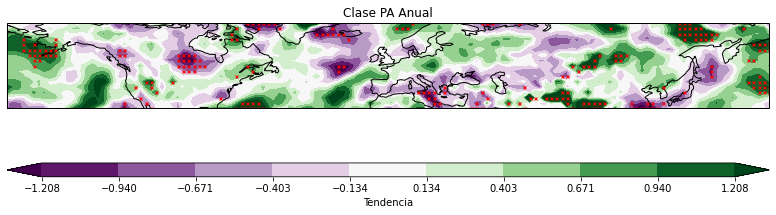

<Figure size 432x288 with 0 Axes>

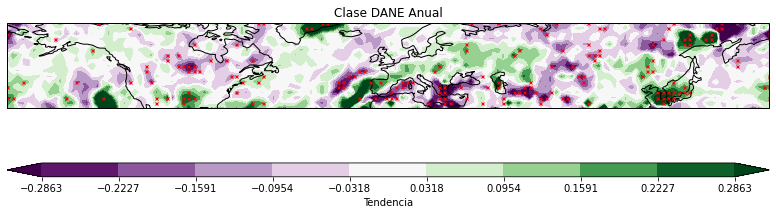

<Figure size 432x288 with 0 Axes>

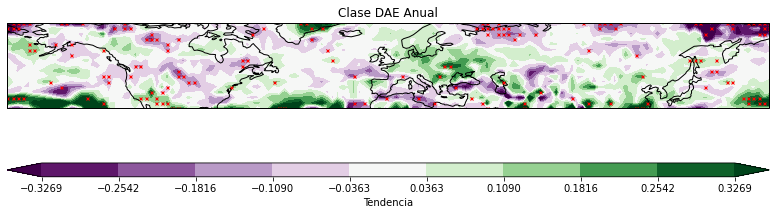

<Figure size 432x288 with 0 Axes>

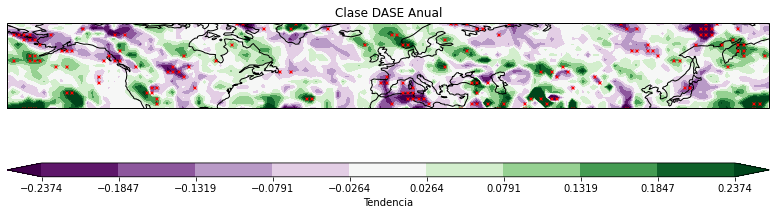

<Figure size 432x288 with 0 Axes>

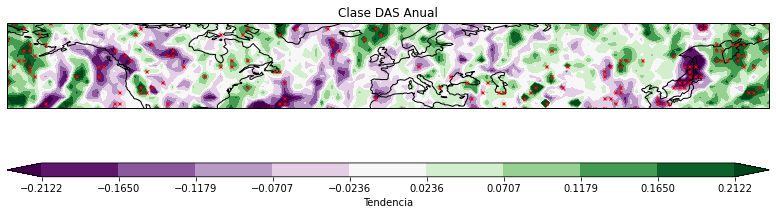

<Figure size 432x288 with 0 Axes>

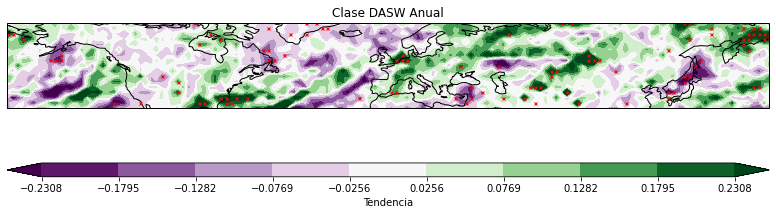

<Figure size 432x288 with 0 Axes>

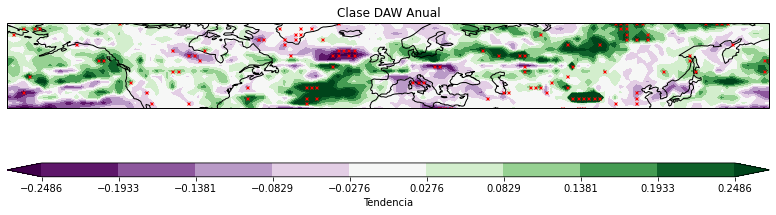

<Figure size 432x288 with 0 Axes>

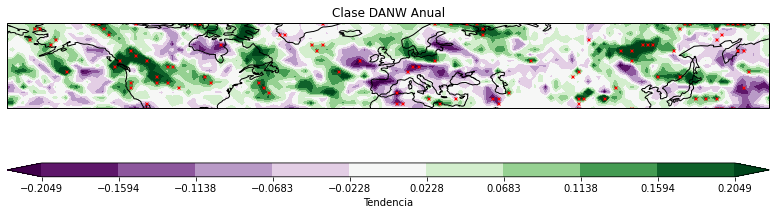

<Figure size 432x288 with 0 Axes>

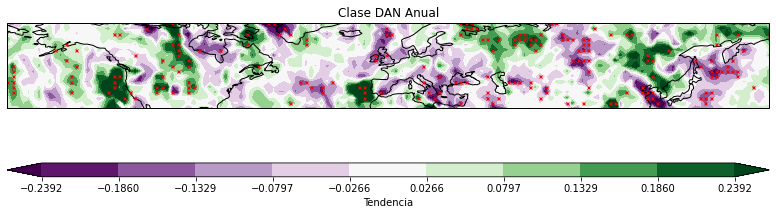

<Figure size 432x288 with 0 Axes>

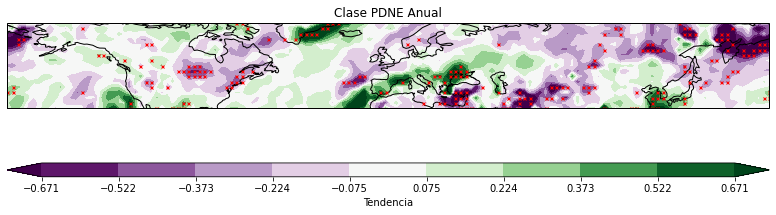

<Figure size 432x288 with 0 Axes>

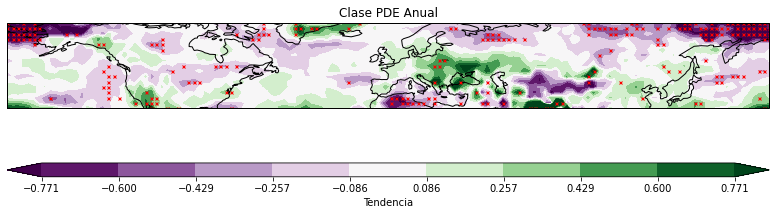

<Figure size 432x288 with 0 Axes>

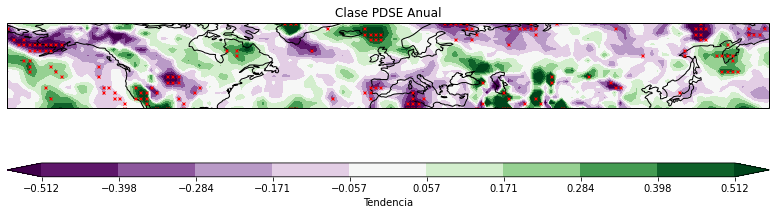

<Figure size 432x288 with 0 Axes>

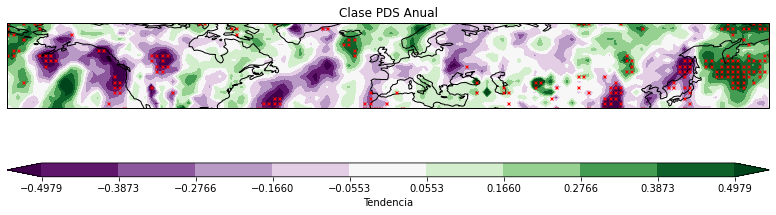

<Figure size 432x288 with 0 Axes>

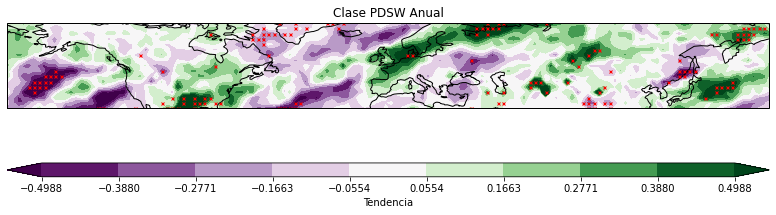

<Figure size 432x288 with 0 Axes>

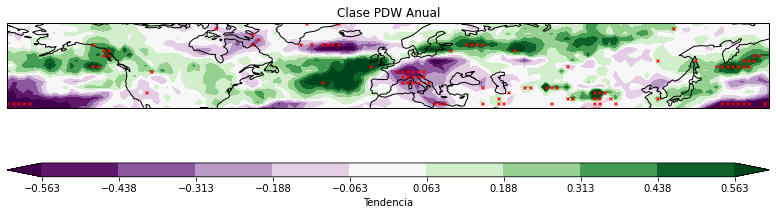

<Figure size 432x288 with 0 Axes>

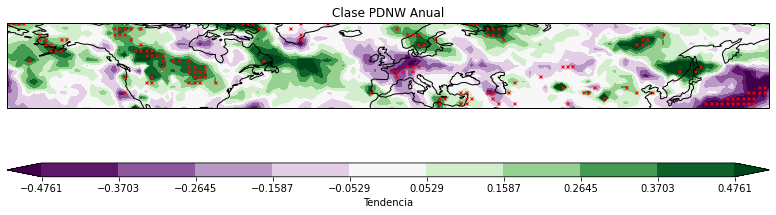

<Figure size 432x288 with 0 Axes>

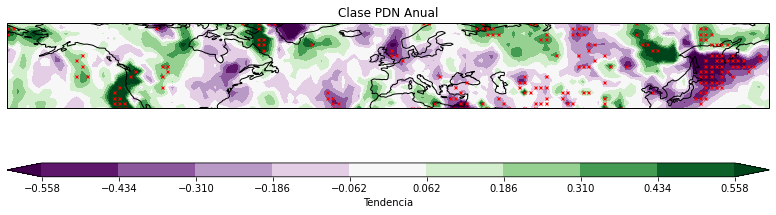

<Figure size 432x288 with 0 Axes>

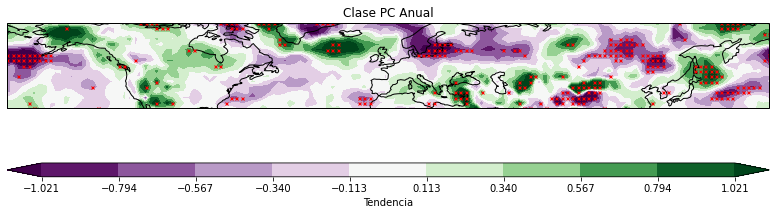

<Figure size 432x288 with 0 Axes>

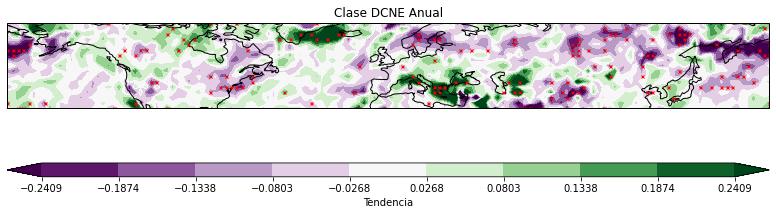

<Figure size 432x288 with 0 Axes>

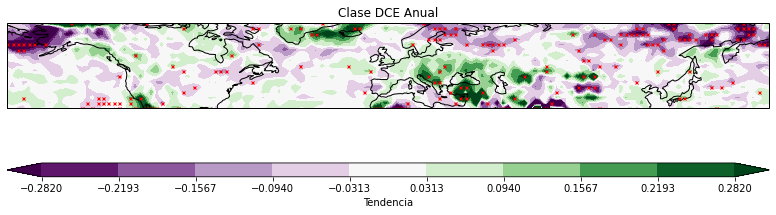

<Figure size 432x288 with 0 Axes>

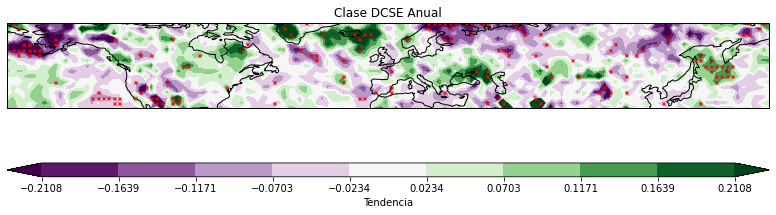

<Figure size 432x288 with 0 Axes>

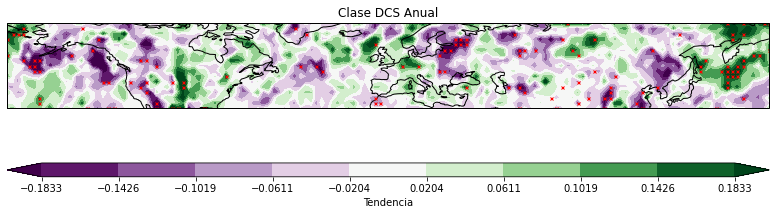

<Figure size 432x288 with 0 Axes>

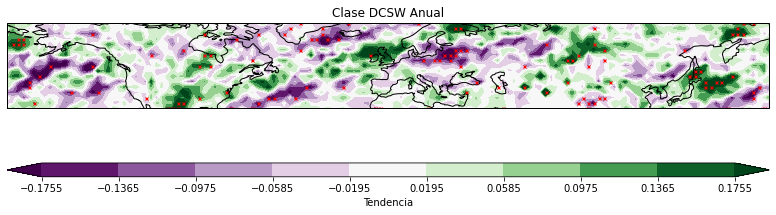

<Figure size 432x288 with 0 Axes>

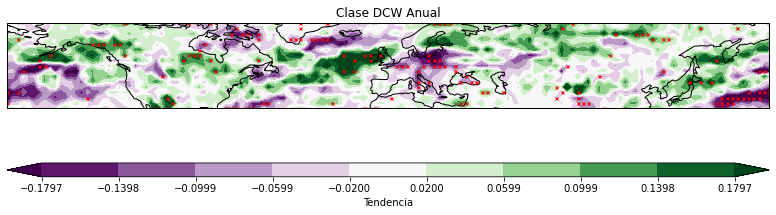

<Figure size 432x288 with 0 Axes>

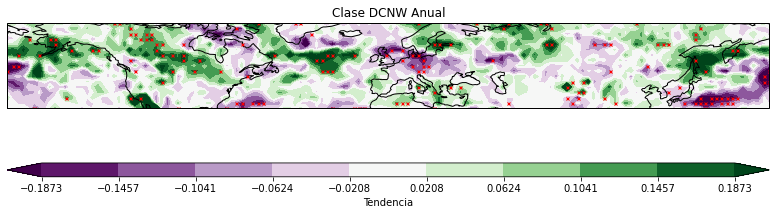

<Figure size 432x288 with 0 Axes>

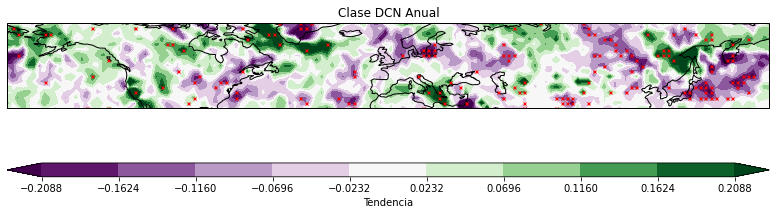

<Figure size 432x288 with 0 Axes>

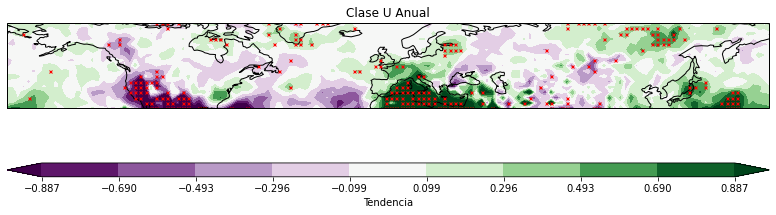

<Figure size 432x288 with 0 Axes>

In [6]:
for i in range(0,dimwt):
    NumClase=i+1
    labelclase=Tipos[NumClase-1]
    pvalor_Clase=datos_pvalor.sel(Clase=NumClase)        #DataArray
    slope_Clase=datos_slope.sel(Clase=NumClase)           #DataArray
    labelclase=Tipos[NumClase-1]
    figure=plt.figure(figsize=(1366/100,671/100))
    #Dibujo con cartopy las proyección PlateCarree en la región escogida 
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent(extent) #Esto es para que saque el mapa solo de la región escogida
    #ax.set_global() #Esto es para que saque el mapa de todo el mundo
    ax.coastlines()
    maxBarra=np.percentile(np.abs(slope_Clase.values),95)
    minBarra=-maxBarra
    levels=list(np.linspace(minBarra,maxBarra,10))
    b=ax.contourf(lon, lat, slope_Clase,cmap='PRGn', levels=levels, extend='both')
    plt.colorbar(b, label='Tendencia', orientation='horizontal', aspect=50)
    #Sacamos los puntos en los que pvalor<0.05 y los dibujamos en el mapa anterior con una cruz blanca
    for i in range(len(lat)):
        for j in range(len(lon)):
            if pvalor_Clase[i,j]<0.05:
                #print('lat: ', lat[i])
                #print('lon: ', lon[i])
                #print('pvalor_Clase: ', pvalor_Clase[i,j])
                x=lon[j]
                y=lat[i]
                plt.plot(x,y,marker='x', color='r', markersize=3)
    plt.xlim((-180, 177.5))
    plt.title('Clase '+labelclase+' '+labelperiodotemporal)
    plt.show()
    plt.savefig('Tendencia_Clase_'+labelclase+'_'+labelperiodotemporal+'.png')
    

datos.close()